## SB_BSSD5350_Homework 11.2

**Source:**  https://towrdsdatascience.com/finding-most-common-colors-in-python-47ea0767a06a

## Global ##

In [134]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
from collections import Counter
from sklearn.cluster import KMeans

In [135]:
#globals
dim = (500, 300)

# image list
img_lst = ['bird', 'deer', 'cat', 'giraffe', 'bison', 'rail', 'pond', 'deer', 'airplane',
          'tower', 'sign', 'african_elephant', 'cat', 'sunflowers', 'donuts', 'citystreet']
img_lst.sort()

## Helper Functions ##

In [136]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [137]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette, perc

In [138]:
def resample(labels, centers):
    resamp = []
    #what is the label for this pixel
    for p in labels:
        #put the color for that label into the resample 
        resamp.append(centers[p])
    #convert the list to np array of original shape (w, h, & 3 for rgb)  
    #res = np.array(resamp).reshape((dim[1], dim[0], 3)
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    #show the image with rgb values between 0 and 1 
    #plt.imshow(res/255.0)

In [139]:
#color idx is the color index to isolate and
# fill is the color to fill in everything that is not that color 
def isolate_color(labels, centers, color_idx, fill_idx):
    resamp = []
    #what is the label for this pixel
    for p in labels:
        if p == color_idx:
            #put the color for that label into the resample 
            resamp.append(centers[p])
        else:
            resamp.append(centers[fill_idx])
    #convert the list to np array of original shape (w, h, & 3 for rgb)   res = np.array(resamp).reshape((dim[1], dim[0], 3))
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    #show the image with rgb values between 0 and 1 
    plt.imshow(res/255.0)


In [140]:
def transfer(labels, centers):
    resamp = []
    #What  is the label for this pixel
    for p in labels:
        #put the color for tha lable into the resample
        resamp.append(centers[p])
    #convert the list to np array  of origianl shape (w, h, & 3 for rgb)
    res = np.array(resamp).reshape((dim[1], dim[0], 3))
    #show the image with rgb values between 0 and 1
    plt.imshow(res/255.0)
    
    return res

## Driving Function ##

In [141]:
def switch_image(button):
    img_1 = cv.imread("img/" + img1.value + ".jpg")
    img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
    img_2 = cv.imread("img/"+ img2.value + ".jpg")
    img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

    dim = (500, 300)
    # resize image
    img_1 = cv.resize(img_1, dim, interpolation = cv.INTER_AREA)
    img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

    #show_img_compar(img_1, img_2)



    clt = KMeans(n_clusters=3)
    clt.fit(img_1.reshape(-1, 3))

    clt_1 = clt.fit(img_1.reshape(-1, 3))
    #show_img_compar(img_1, palette_perc(clt_1))

    clt_2 = clt.fit(img_2.reshape(-1, 3))
    #show_img_compar(img_2, palette_perc(clt_2))



    resample(clt_1.labels_, clt_1.cluster_centers_)

    isolate_color(clt_2.labels_, clt_2.cluster_centers_, 2, 1)
    isolate_color(clt_1.labels_, clt_1.cluster_centers_, 1, 2)

    transfer(clt_2.labels_, clt_1.cluster_centers_)
    transfer(clt_1.labels_, clt_2.cluster_centers_)



    nc = clusters.value
    clt1 = KMeans(n_clusters=nc)  #use nc here
    clt_1 = clt1.fit(img_1.reshape(-1, 3))
    pal1, perc1 = palette_perc(clt_1)
    show_img_compar(img_1, pal1)

    clt2 = KMeans(n_clusters=nc)  #use nc here
    clt_2 = clt2.fit(img_2.reshape(-1, 3))
    pal2, perc2 = palette_perc(clt_2)
    show_img_compar(img_2, pal2)


    #for replacement colors
    percs = list(perc1.values())
    keys = list(perc1.keys())

    #fortarget colors
    percs2 = list(perc2.values())
    keys2 = list(perc2.keys())

    sort_perc = sorted(perc1.values())
    sort_perc2 = sorted(perc2.values())

    for i in range(len(sort_perc)):
        r_idx = percs.index(sort_perc[i])
        t_idx = percs2.index(sort_perc2[i])
        r_ki = keys[r_idx]
        t_ki = percs.index(sort_perc[i])
        r_color = clt_1.cluster_centers_[r_ki]
        clt_2.cluster_centers_[t_ki] = r_color
    

    transfer_img = transfer(clt_2.labels_, clt_1.cluster_centers_)


    img = cv.cvtColor(transfer_img.astype('uint8'), cv.COLOR_RGB2BGR)
    cv.imwrite("transfer.png", img)

## Widgets ##

{0: 0.3, 1: 0.21, 2: 0.49}
[[182.2315726  170.56780701  38.63265716]
 [ 91.93873574 140.24618867 183.00069154]
 [ 66.73690307  96.40329263  52.44601777]]


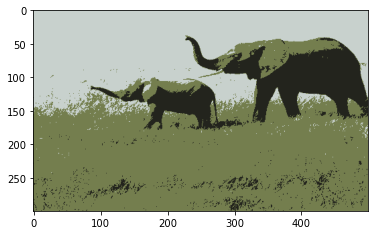

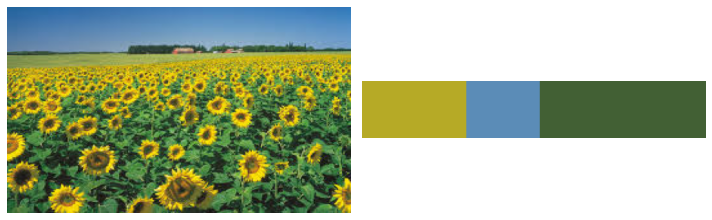

{0: 0.33, 1: 0.14, 2: 0.53}
[[200.23079283 209.43787842 205.72265178]
 [ 35.60180891  36.88339518  29.3538961 ]
 [116.54775493 126.94182422  78.79536655]]


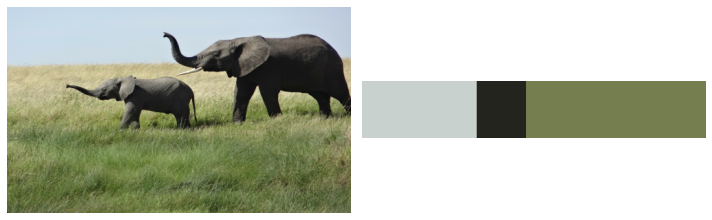

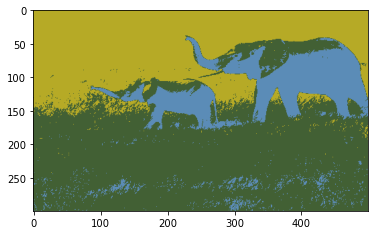

{0: 0.14, 1: 0.04, 2: 0.15, 3: 0.08, 4: 0.11, 5: 0.05, 6: 0.11, 7: 0.13, 8: 0.06, 9: 0.14}
[[ 82.6135839  117.30099732  42.6384246 ]
 [220.09047444 232.42294961 207.5746598 ]
 [ 27.32609191  40.78562645  17.3272305 ]
 [127.42067017 139.22567622 114.65555107]
 [ 85.84541949  97.35189985  83.6195233 ]
 [152.67357769 178.43304949  93.88991731]
 [ 56.29594423  88.05551331  22.95183777]
 [109.8366984  140.05235903  67.4549116 ]
 [178.30966838 192.27008407 151.57356376]
 [ 53.59915014  64.69485364  52.76614731]]


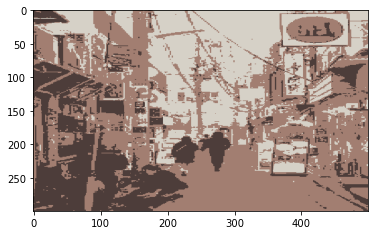

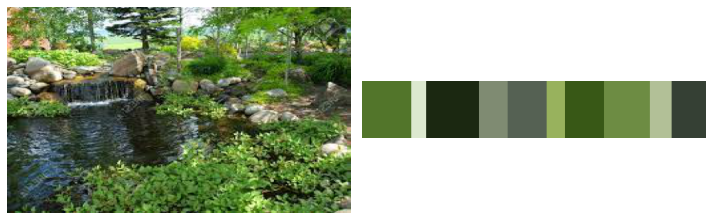

{0: 0.12, 1: 0.12, 2: 0.1, 3: 0.06, 4: 0.05, 5: 0.16, 6: 0.07, 7: 0.1, 8: 0.14, 9: 0.08}
[[206.51201468 201.54676837 191.75104662]
 [114.34738419  89.22108698  81.68653044]
 [176.95076194 165.52029709 158.712063  ]
 [ 31.82367203  28.862905    31.55433106]
 [196.79262039 100.58148843  70.53958724]
 [133.25313037 116.351379   111.35358867]
 [228.34747878 159.24862706 116.92900649]
 [230.96796261 238.21383094 233.21660797]
 [167.25449502 133.36212789 122.61058002]
 [ 78.24150815  60.47452446  56.54933764]]


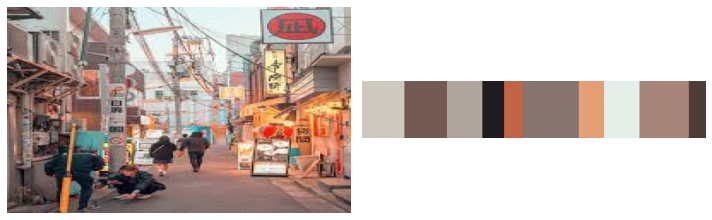

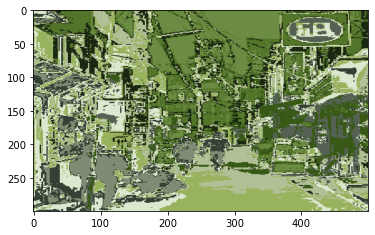

{0: 0.01, 1: 0.0, 2: 0.0, 3: 0.01, 4: 0.0, 5: 0.01, 6: 0.01, 7: 0.01, 8: 0.0, 9: 0.0, 10: 0.01, 11: 0.0, 12: 0.01, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.01, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.01, 23: 0.01, 24: 0.0, 25: 0.01, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.01, 36: 0.01, 37: 0.0, 38: 0.0, 39: 0.01, 40: 0.0, 41: 0.01, 42: 0.0, 43: 0.01, 44: 0.01, 45: 0.01, 46: 0.0, 47: 0.01, 48: 0.0, 49: 0.01, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.01, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.01, 70: 0.0, 71: 0.01, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.01, 77: 0.0, 78: 0.0, 79: 0.01, 80: 0.01, 81: 0.0, 82: 0.01, 83: 0.0, 84: 0.01, 85: 0.01, 86: 0.0, 87: 0.0, 88: 0.01, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.01, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.01, 107: 0.

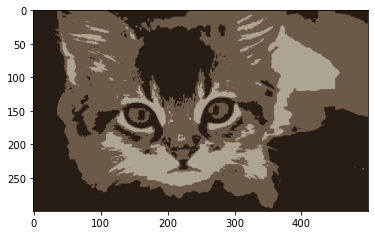

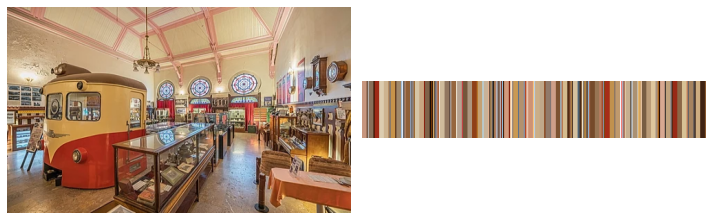

{0: 0.0, 1: 0.0, 2: 0.01, 3: 0.0, 4: 0.01, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.01, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.01, 13: 0.01, 14: 0.0, 15: 0.0, 16: 0.01, 17: 0.01, 18: 0.01, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.01, 38: 0.0, 39: 0.0, 40: 0.01, 41: 0.01, 42: 0.01, 43: 0.01, 44: 0.01, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.01, 50: 0.0, 51: 0.0, 52: 0.01, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.01, 61: 0.0, 62: 0.0, 63: 0.01, 64: 0.0, 65: 0.01, 66: 0.01, 67: 0.0, 68: 0.01, 69: 0.01, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.01, 75: 0.0, 76: 0.0, 77: 0.01, 78: 0.0, 79: 0.02, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.01, 86: 0.01, 87: 0.0, 88: 0.0, 89: 0.01, 90: 0.0, 91: 0.0, 92: 0.01, 93: 0.01, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.01, 99: 0.01, 100: 0.0, 101: 0.01, 102: 0.01, 103: 0.01, 104: 0.0, 105: 0.0, 106: 0.0, 107:

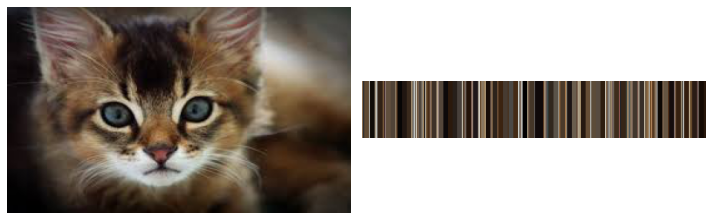

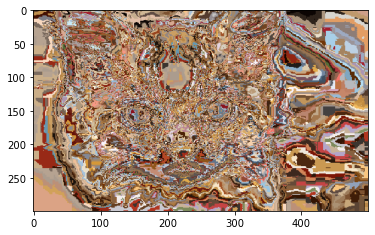

In [142]:
from ipywidgets import widgets
img1 = widgets.Dropdown(options = img_lst)
img2 = widgets.Dropdown(options = img_lst)
clusters = widgets.IntText(value=3, description='Clusters:', disabled=False)
submit = widgets.Button(description='Submit')
submit.on_click(switch_image)
widgets.HBox([img1, img2, clusters, submit])